# Desafío Algoritmos de clásificacion
#### Lucas Hernández, Matías Pariente y Diego Bouzada

<!-- # Desafío Complementario: Algoritmo de clásificación - Arbol de decisión -->

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Utilizamos un nuevo dataset sin nulos y outliers

In [41]:
df_bicis = pd.read_csv ("C:/Users/Lenovo/Downloads/ecobici2018a2020v3.csv")
df_bicis.head ()

,Unnamed: 0,id_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,genero_usuario,edad_usuario,tiempo_recorrido
0,0,179119,2018-01-01 00:20:14,50,Hospital Rivadavia,2018-01-01 00:47:53,31,Padilla,F,51,27
1,1,179119,2018-04-25 23:30:28,50,Hospital Rivadavia,2018-04-26 02:00:51,50,Hospital Rivadavia,F,51,30
2,2,179119,2018-09-21 19:45:07,129,Velasco,2018-09-21 20:10:24,50,Hospital Rivadavia,F,51,25
3,3,179119,2019-05-19 12:17:03,222,160 - Godoy Cruz y Libertador,2019-05-19 13:20:55,214,142 - Armenia y Gorriti,F,51,3
4,4,400147,2018-01-01 00:20:22,111,Macacha Güemes,2018-01-01 01:09:13,54,Acuña de Figueroa,M,27,48


In [42]:
#Eliminamos la columna Unnamed
try:
    df_bicis.drop(columns='Unnamed: 0' , inplace=True)
except KeyError:
    print("La columna Unnamed no está en el df")

In [43]:
df_bicis.columns

Index(['id_usuario', 'fecha_origen_recorrido', 'id_estacion_origen',
       'nombre_estacion_origen', 'fecha_destino_recorrido',
       'id_estacion_destino', 'nombre_estacion_destino', 'genero_usuario',
       'edad_usuario', 'tiempo_recorrido'],
      dtype='object')

# Algoritmo Arbol de Desición
### Realizamos un subset del dataset al 10% ya que nos arroja error de memoria con mas de ese número

In [69]:
df_bicis_sample = df_bicis.sample(frac=0.01)
df_bicis_sample.head()

,id_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,genero_usuario,edad_usuario,tiempo_recorrido
1846091,173828,2018-07-07 18:24:27,200,Austria y French,2018-07-07 18:33:04,64,Riobamba,F,55,8
3024354,355844,2019-10-06 14:23:44,19,019 - PLAZA SAN MARTIN,2019-10-06 14:54:47,19,019 - PLAZA SAN MARTIN,M,35,31
79261,169841,2018-01-06 05:51:08,124,Ugarteche,2018-01-06 06:22:22,39,Congreso II,M,29,31
323985,408368,2018-08-02 16:59:01,102,Roseti,2018-08-02 17:15:07,31,Padilla,F,19,16
643863,436743,2018-05-12 01:15:48,193,Arenales y Agüero,2018-05-12 01:30:24,66,Billinghurst,M,24,14


In [70]:
df_estaciones = df_bicis_sample.iloc[:, [0,2,5,9]]
df_estaciones

,id_usuario,id_estacion_origen,id_estacion_destino,tiempo_recorrido
1846091,173828,200,64,8
3024354,355844,19,19,31
79261,169841,124,39,31
323985,408368,102,31,16
643863,436743,193,66,14
...,...,...,...,...
555100,435180,188,197,10
1739856,402796,335,283,18
1843131,557047,27,131,15
3692066,413939,166,4,23


In [71]:
bicis_dummies_sample = pd.get_dummies(df_estaciones, columns = ["id_estacion_origen", 'id_estacion_destino'])
bicis_dummies_sample.head()

,id_usuario,tiempo_recorrido,id_estacion_origen_1,id_estacion_origen_2,id_estacion_origen_3,id_estacion_origen_4,id_estacion_origen_5,id_estacion_origen_6,id_estacion_origen_7,id_estacion_origen_8,...,id_estacion_destino_434,id_estacion_destino_435,id_estacion_destino_436,id_estacion_destino_441,id_estacion_destino_442,id_estacion_destino_443,id_estacion_destino_444,id_estacion_destino_447,id_estacion_destino_448,id_estacion_destino_449
1846091,173828,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3024354,355844,31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79261,169841,31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323985,408368,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
643863,436743,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
#bicis_dummies_sample = pd.get_dummies(df_bicis_sample, columns = ["id_estacion_origen", 'id_estacion_destino'])
#bicis_dummies_sample.shape

In [73]:
#df_estaciones4 = df_estaciones.iloc[:, [0,2,5,9]]
#df_estaciones4.shape

In [74]:
features= df_estaciones.drop(columns=['id_usuario'])
features_dummy= pd.get_dummies(features, columns=['id_estacion_origen','id_estacion_destino'])
features_dummy.shape

(38044, 860)

In [75]:
X = features_dummy.drop('tiempo_recorrido', axis=1)
y = features_dummy.tiempo_recorrido
X

,id_estacion_origen_1,id_estacion_origen_2,id_estacion_origen_3,id_estacion_origen_4,id_estacion_origen_5,id_estacion_origen_6,id_estacion_origen_7,id_estacion_origen_8,id_estacion_origen_9,id_estacion_origen_10,...,id_estacion_destino_434,id_estacion_destino_435,id_estacion_destino_436,id_estacion_destino_441,id_estacion_destino_442,id_estacion_destino_443,id_estacion_destino_444,id_estacion_destino_447,id_estacion_destino_448,id_estacion_destino_449
1846091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3024354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
643863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1843131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3692066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
def transform_target(target):
    if target <= 5:
        return "Hasta 5 minutos"
    elif 5 < target <=10:
        return "De 5 a 10 minutos"
    elif 10 < target <=15:
        return "De 10 a 15 minutos"
    elif 15 < target <=20:
        return "De 15 a 20 minutos"
    elif 20 < target <=25:
        return "De 20 a 25 minutos"
    elif 25 < target <=30:
        return "De 25 a 30 minutos"
    elif 30 < target <=35:
        return "De 30 a 35 minutos"
    elif 35 < target <=40:
        return "De 35 a 40 minutos"
    elif target > 40:
        return "Mas de 40 minutos"
    else:
        raise ValueError
        
features_dummy.tiempo_recorrido.apply(transform_target)

1846091     De 5 a 10 minutos
3024354    De 30 a 35 minutos
79261      De 30 a 35 minutos
323985     De 15 a 20 minutos
643863     De 10 a 15 minutos
                  ...        
555100      De 5 a 10 minutos
1739856    De 15 a 20 minutos
1843131    De 10 a 15 minutos
3692066    De 20 a 25 minutos
2957708    De 10 a 15 minutos
Name: tiempo_recorrido, Length: 38044, dtype: object

In [77]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [78]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=40, random_state = 42) #Creamos el modelo

In [79]:
#Entrenamos el modelo
tree.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=40, random_state=42)

In [80]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [81]:
X = features_dummy.drop('tiempo_recorrido', axis=1)
y_cat = features_dummy.tiempo_recorrido.apply(transform_target)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.20, random_state=42) 

In [82]:
tree_cat = DecisionTreeClassifier(max_depth=40, random_state = 42) #Creamos el modelo
tree_cat.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=40, random_state=42)

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
y_train_pred = tree_cat.predict(X_train)
y_test_pred = tree_cat.predict(X_test)

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.2355511746344669
% de aciertos sobre el set de evaluación: 0.1967407018004994


In [85]:
from sklearn.tree import plot_tree

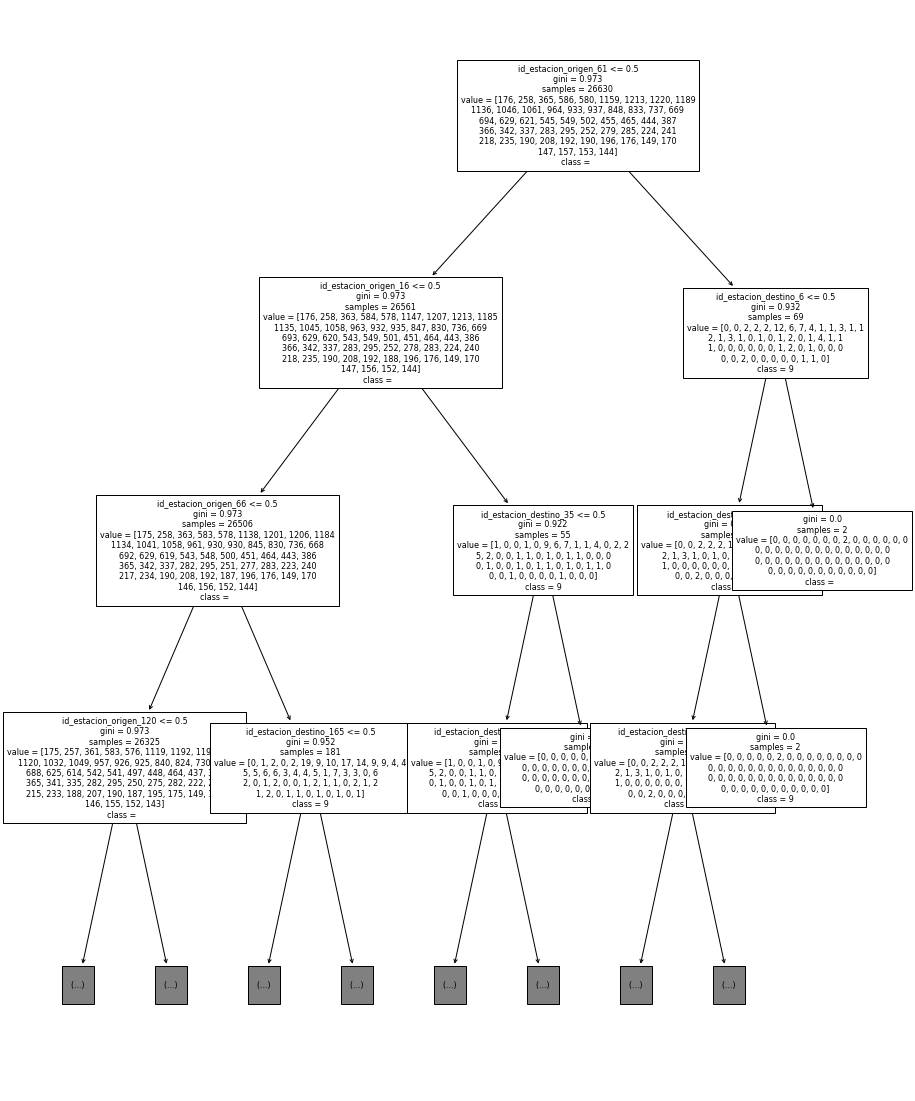

In [96]:
plt.figure(figsize=(15,20))
plot_tree(tree, feature_names=X_train.columns, max_depth=3, fontsize=8, class_names=str(y)) #hack para que y sea str
plt.show()

# KNN


In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)
X = features_dummy.drop('tiempo_recorrido', axis=1)
y_cat = features_dummy.tiempo_recorrido.apply(transform_target)

knn.fit(X, y_cat)

KNeighborsClassifier(n_neighbors=20)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.20, random_state=123) 

In [89]:
n_neighbors = 20
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.31
Accuracy of K-NN classifier on test set: 0.21


# Random Forest 

In [97]:
#Separamos en train y test!
(X_train2, X_test2,
y_train2, y_test2) = train_test_split(X,
                                    y_cat,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [98]:
#Creamos un arbol de decisión sencillo y lo fiteamos
tree2 = DecisionTreeClassifier(random_state=11)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [99]:
y_test_pred = tree2.predict(X_test) #Prediccion en Test

In [100]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.23919043238270468


In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [103]:
y_test_pred = model.predict(X_test) #Prediccion en Test

In [104]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.22907083716651333
